# Importing Libraries

In [3]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

____

# General annealing function


In [4]:
def Annealing(cost, random_jump, init_guess, T, decay,k, iterations):

    x = init_guess
    c = cost(x)

    # Iteration over the given range to find optimum using Annealing
    for i in range(iterations):

        # Taking a new random guess in the temp range
        X = random_jump(x,(np.random.random_sample() - 0.5) * T)

        C = cost(X)

        # Confirm jump if its better
        if C < c: 
            x = X
            c = C

        # Conditional jump with Arrhenius Probability
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(C - c) / (k * T)):
                x = X
                c = C
        # Modifying the temp
        T *= decay

    return x

Here I define a general function to perform annealing to minimize a function. THe function taking parameters
- Cost function
- Initial Guess
- Initial Temperature
- Decay rate and k
- Random jump distance
- Number of iterations

____

# Travelling Salesman

## Defining basic functions

In [5]:
# Function to find the cost of each of the paths
def tsp_cost(cities, path):

    sum_dist = 0
    
    # Iterating over all the points in the order of path to give the current path length
    for i in range(-1, len(path) - 1):
        sum_dist += np.linalg.norm(cities[path[i]] - cities[path[i + 1]])

    return sum_dist

# Function to perform random swaps between two points
def tsp_swap(path, distance):
    
    swaps = np.random.randint(int(np.abs(distance)) + 1) + 1
    new_path = path.copy()

    for _ in range(swaps):
        swap0, swap1 = np.random.randint(len(path), size=2)
        tmp = new_path[swap0]
        new_path[swap0] = new_path[swap1]
        new_path[swap1] = tmp

    return new_path

The above cell defines two general functions that are used in the travelling salesman problem extensively. One to find the cost of any path that is chosen and other to find the random swap between two points in the path

## Choosing input file

### 10 cities, 500 iterations

In [6]:
input_filename = "tsp_10.txt"
start_temp_scale = 1/5
iterations = 1000

### 100 cities, 5,000 iterations

In [12]:
input_filename = "tsp_100.txt"
start_temp_scale = 1/100
iterations = 5000

### 100 cities, 30,000 iterations

In [10]:
input_filename = "tsp_100.txt"
start_temp_scale = 1/5
iterations = 30000

## Read the list of cities

In [11]:
lines = open(input_filename, "r").readlines()

# List of points(given)
cities = []

for line in lines[1:]:
    s = line.split()
    cities.append(np.array([float(s[0]), float(s[1])]))

## Get result

In [12]:
# Creating an intial path of random order
init_path = list(range(len(cities)))

# FInding the optimum path using Annealing
optimum_path = Annealing(partial(tsp_cost, cities),tsp_swap,init_path,len(cities) * start_temp_scale,0.99,0.1,iterations)

# Printing the results
print(optimum_path)
print(tsp_cost(cities, optimum_path))

[58, 82, 46, 17, 54, 21, 22, 36, 80, 88, 41, 89, 67, 78, 26, 94, 60, 63, 95, 39, 19, 30, 25, 86, 15, 84, 12, 23, 85, 10, 32, 33, 62, 98, 38, 42, 50, 52, 99, 18, 71, 90, 73, 64, 2, 5, 40, 45, 56, 49, 13, 8, 4, 16, 76, 6, 34, 57, 72, 87, 92, 14, 3, 55, 31, 53, 97, 59, 29, 96, 91, 66, 20, 83, 77, 35, 28, 69, 43, 79, 70, 1, 44, 81, 37, 11, 9, 7, 27, 93, 65, 0, 61, 24, 74, 68, 47, 51, 48, 75]
138.53601718387546


The above cell starts by making an intial random guess for the path and then optimize it using annealing.. Then prints both the result and the cost of the total distance

## Plot result

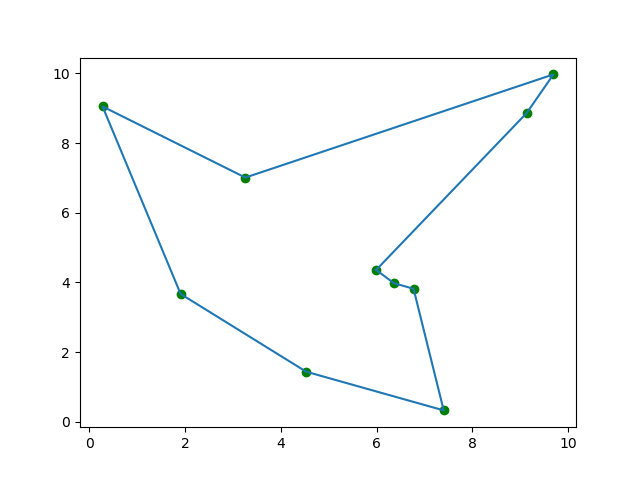

In [9]:
# Create a new figure and axes objects
fig, ax = plt.subplots()

# Plot the cities as green circles using their coordinates from the cities list
lnpoints, = ax.plot([cities[i][0] for i in range(len(cities))],[cities[i][1] for i in range(len(cities))],'go')

ln, = ax.plot([], [])

# Create a list of coordinates for the TSP path by referencing the indices in the optimum_path list
coords = []
for c in optimum_path:
    coords.append(cities[c])
coords.append(cities[optimum_path[0]]) # Complete the path by adding the starting city as the endpoint
coords = np.array(coords)

# Set the data for the plot line object to be the coordinates of the TSP path
ln.set_data(coords[:, 0], coords[:, 1])
plt.show()